# **Artificial Neural Network (ANN)**
***
Cara kerja Artificial Neural Network terinspirasi oleh kerja jaringan saraf otak manusia (Neuron) yang sebenarnya. Sangat jelas bahwa fungsi otak manusia begitu kompleks dan akan menjadi tantangan jika akan mereplikasinya. Kami mencoba melatih jaringan saraf untuk berpikir/memahami seperti otak manusia. Algoritma mengekspos dunia melalui data yang diberikan.

Berbagai jenis neural network bertanggung jawab untuk berbagai jenis pembelajaran dan penyelesaian berbagai jenis masalah. Jaringan ini dapat dikategorikan menjadi:
* **Artificial Neural Networks (ANN)** :\
Model pemrosesan informasi yang membantu dalam mengekstraksi insight yang berbeda dari data dan mencoba meniru kerja otak manusia.
* **Convolution Neural Network (CNN)** :\
CNN melakukan operasi konvolusi pada data. CNN biasanya digunakan untuk gambar dan teks karena sangat bagus untuk ekstraksi fitur.
* **Recurrent Neural Network (RNN)** :\
RNN bekerja dengan baik untuk data sekuensial seperti teks karena mereka mempertimbangkan input saat ini serta input dari waktu sebelumnya sehingga berkinerja baik pada data teks dimana urutan data penting.
* **Long Short Term Memory (LSTM)** :\
Versi RNN yang ditingkatkan. LSTM juga berkinerja baik pada data sekuensial dan banyak digunakan karena mengatasi keterbatasan RNN.

## **Single Layer Perceptron Model**
Perceptron adalah jenis Supervised Learning dari Binary Classification. Ini adalah algoritma klasifikasi yang membuat prediksi berdasarkan fungsi prediksi linier dengan kombinasi vektor weight.

Cara kerja simple perceptron yaitu dengan mengambil input dan melakukan perkalian dengan matriks weight. Bobot sama dengan jumlah input ditambah 1 (bias). Setelah perkalian ini dihitung untuk semua input, kemudian dihitung jumlah input yang melewati Step Function. Step Function ini biasanya merupakan fungsi threshold di mana kita dapat menetapkan ambang batas untuk output yang diberikan. Keluaran jaringan di atas ambang batas dianggap sebagai satu kelas atau 1 ("ya") dan keluaran di bawah ambang batas dianggap sebagai kelas lain atau 0 ("tidak").

### Load Dataset

In [37]:
import tensorflow as tf
from tensorflow import keras

mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

### Reshape Dataset

In [38]:
# X_train is 60000 rows of 28x28 values; we reshape it to 60000 x 784.
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

### Normalize Dataset

In [39]:
# Normalize inputs to be within in [0, 1].
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### Labeling Dataset

In [40]:
# Labels have one-hot representation.
NB_CLASSES = 10

Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


### Build Model

In [41]:
# Developing single layer neural network
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES, input_shape=(RESHAPED,), kernel_initializer='zeros', 
                             name='dense_layer', activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Compiling Model

In [42]:
# Compiling the model.
# Optimizers = Adam
# Loss-function = Categorical-crossentropy (multiclass classification)
# metric = accuracy

model.compile(optimizer='Adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train Model

In [43]:
# Training the model
EPOCHS = 50               # Number of iteration
BATCH_SIZE = 128          # Number of samples per gradient update
VERBOSE = 1               # Verbosity mode
VALIDATION_SPLIT = 0.2    # Fraction of the training data to be used as validation data.

model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/50
375/375 [==============================] - 2s 4ms/step - loss: 0.7289 - accuracy: 0.8480 - val_loss: 0.4036 - val_accuracy: 0.8995
Epoch 2/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3857 - accuracy: 0.8979 - val_loss: 0.3316 - val_accuracy: 0.9114
Epoch 3/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3359 - accuracy: 0.9077 - val_loss: 0.3059 - val_accuracy: 0.9157
Epoch 4/50
375/375 [==============================] - 1s 4ms/step - loss: 0.3130 - accuracy: 0.9142 - val_loss: 0.2915 - val_accuracy: 0.9205
Epoch 5/50
375/375 [==============================] - 1s 4ms/step - loss: 0.2993 - accuracy: 0.9175 - val_loss: 0.2841 - val_accuracy: 0.9227
Epoch 6/50
375/375 [==============================] - 1s 4ms/step - loss: 0.2895 - accuracy: 0.9185 - val_loss: 0.2773 - val_accuracy: 0.9231
Epoch 7/50
375/375 [==============================] - 1s 4ms/step - loss: 0.2826 - accuracy: 0.9219 - val_loss: 0.2752 - val_accuracy: 0.9244
Epoch 

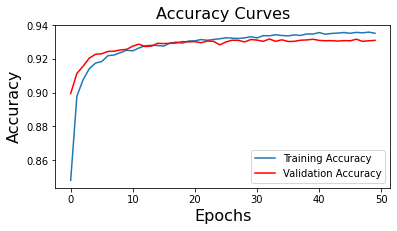

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=[6,3])
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'],'r')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

### Evaluate Model

In [47]:
# Evaluating the model.
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy :', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2677 - accuracy: 0.9282
Test accuracy : 0.9282000064849854


## **Activation Function**
Fungsi aktivasi sebagai fungsi matematika sederhana yang membantu dalam memahami sesuatu yang sangat rumit dan pemetaan fungsional kompleks non-linier antara input yang diberikan dan output. **Fungsi Aktivasi** digunakan untuk menangkap properti non-linear ke network luar.

**Tujuan utama** dari fungsi ini adalah untuk mengubah sinyal input menjadi sinyal output. Dilakukan jumlah produk (sum of product) dari bobot dan input yang masuk ke fungsi aktivasi. Keluaran dari fungsi aktivasi merupakan masukan bagi lapisan berikutnya dan seterusnya.

Beberapa fungsi aktivasi adalah :
* Sigmoid function
* tanh function
* ReLU function (Rectified Linear Unit)
* ELU function (Exponential Linear Unit)
* Leaky ReLU

## **Multi Layer Perceptron Model**

Secara historis, "perceptron" adalah nama yang diberikan untuk model yang hanya memiliki satu lapisan linier saja, sehingga, jika memiliki banyak lapisan, disebut sebagai multi-layer perceptron (MLP). **Multi-layer Perceptron** memiliki tiga lapisan: input, output, dan tersembunyi (hidden layer). Lapisan input dan output terlihat dari luar, sementara semua lapisan lain di tengah tersembunyi, oleh karena itu disebut lapisan tersembunyi atau **hidden layer**.

Dalam konteks ini, single layer perceptron hanyalah fungsi linier dan oleh karena itu, multi-layer neural network diperoleh dengan menumpuk beberapa lapisan tunggal satu demi satu. Pada MLP, setiap node di lapisan tersembunyi pertama menerima input dan diaktivasi (0,1) sesuai dengan nilai fungsi linier terkait. Kemudian, output dari lapisan tersembunyi pertama diteruskan ke lapisan kedua di mana fungsi linier lain diterapkan, yang hasilnya diteruskan ke lapisan output akhir yang terdiri dari satu neuron tunggal.


### Load Dataset

In [49]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

# Loading MNIST dataset.
# You can verify that the split between train and test is 60,000, and 10,000 respectively.
# Labels have one-hot representation is automatically applied
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

### Reshape Dataset

In [50]:
# X_train is 60000 rows of 28x28 values; we --> reshape it to 60000 x 784.
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

### Normalize Dataset

In [51]:
# Normalize inputs to be within in [0, 1].
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### Labeling Dataset

In [52]:
# One-hot representation of the labels.
NB_CLASSES = 10 # number of outputs = number of digits

Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


### Modelling

In [53]:
# Build the model.
N_HIDDEN = 128

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED,), name='dense_layer', activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, name='dense_layer_3', activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, name='dense_layer_4', activation='relu'))
model.add(keras.layers.Dense(NB_CLASSES, name='dense_layer_5', activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dense_layer_3 (Dense)       (None, 128)               16512     
                                                                 
 dense_layer_4 (Dense)       (None, 128)               16512     
                                                                 
 dense_layer_5 (Dense)       (None, 10)                1290      
                                                                 
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


### Model Compiling

In [54]:
# Compiling the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train Model

In [55]:
# Training the model.
BATCH_SIZE = 128
EPOCHS = 20
VERBOSE = 1
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION

model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3512 - accuracy: 0.8963 - val_loss: 0.1696 - val_accuracy: 0.9505
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1295 - accuracy: 0.9606 - val_loss: 0.1208 - val_accuracy: 0.9637
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0886 - accuracy: 0.9726 - val_loss: 0.0993 - val_accuracy: 0.9703
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0675 - accuracy: 0.9787 - val_loss: 0.1001 - val_accuracy: 0.9700
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0537 - accuracy: 0.9829 - val_loss: 0.0947 - val_accuracy: 0.9732
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0399 - accuracy: 0.9876 - val_loss: 0.0947 - val_accuracy: 0.9732
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0350 - accuracy: 0.9886 - val_loss: 0.0995 - val_accuracy: 0.9728
Epoch 

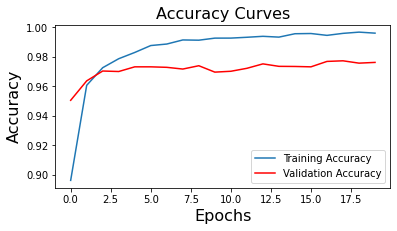

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=[6,3])
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'],'r')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

### Evaluate Model

In [57]:
# Evaluating the model.
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1264 - accuracy: 0.9752
Test accuracy: 0.9751999974250793


## **Back Propagation**

Multi-layer neuron belajar dari data train melalui proses yang disebut **Back Propagation**. Proses ini dapat digambarkan sebagai cara untuk memperbaiki kesalahan secara progresif setelah kesalahan tersebut terdeteksi. Pada awalnya, semua bobot memiliki angka acak. Kemudian, network diaktifkan untuk setiap input dalam train-set: nilai-nilai disebarkan ke depan dari tahap input melalui tahap tersembunyi (hidden-stages) ke tahap keluaran (output-stages) di mana prediksi dibuat.

Karena diketahui nilai pengamatan yang sebenarnya dalam train-set, maka mungkin untuk menghitung kesalahan yang dibuat dalam prediksi. Kunci untuk backtracking adalah menyebarkan kesalahan kembali, menggunakan algoritma pengoptimal (optimizers) yang sesuai untuk menyesuaikan bobot jaringan saraf dengan tujuan mengurangi kesalahan.

<br>

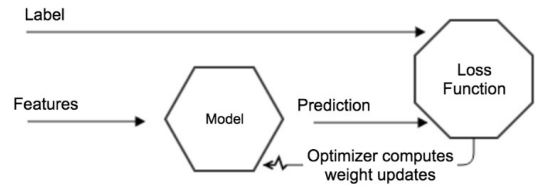

Proses **Forward Propagation** dari input ke output, sedangkan **Back Propagation** kesalahan diulang beberapa kali sampai kesalahan berada di bawah ambang batas yang telah ditentukan. Seluruh proses seperti pada gambar di atas. 

Fitur mewakili input, dan label digunakan di sini untuk melakukan proses pembelajaran. Model diperbarui sedemikian rupa sehingga fungsi kerugian (loss-function) diminimalkan secara progresif. 

Dalam Neural Network, yang terpenting bukanlah output dari satu neuron tetapi bobot kolektif yang disesuaikan di setiap lapisan/layer. Oleh karena itu, jaringan secara progresif menyesuaikan bobot internalnya sedemikian rupa sehingga jumlah label yang diprediksi dengan benar meningkat. Tentu saja, penggunaan fitur yang tepat dan data berlabel yang berkualitas adalah hal mendasar untuk meminimalkan bias selama proses pembelajaran.